<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [249]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [250]:
import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [251]:
# Read the CSV file
df = pd.read_csv('../Module_2_Data_Wrangling/survey_data.csv')
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [252]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [253]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
df_check


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,None,None
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,None,None
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,None,None


## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [254]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [255]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [256]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [257]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [258]:
query = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
comp_total = pd.read_sql(query, conn)
comp_total

,CompTotal
0,2040000.0
1,28000.0
2,85000.0
3,50000.0
4,110000.0
...,...
33735,36000.0
33736,40000.0
33737,61000.0
33738,58000.0


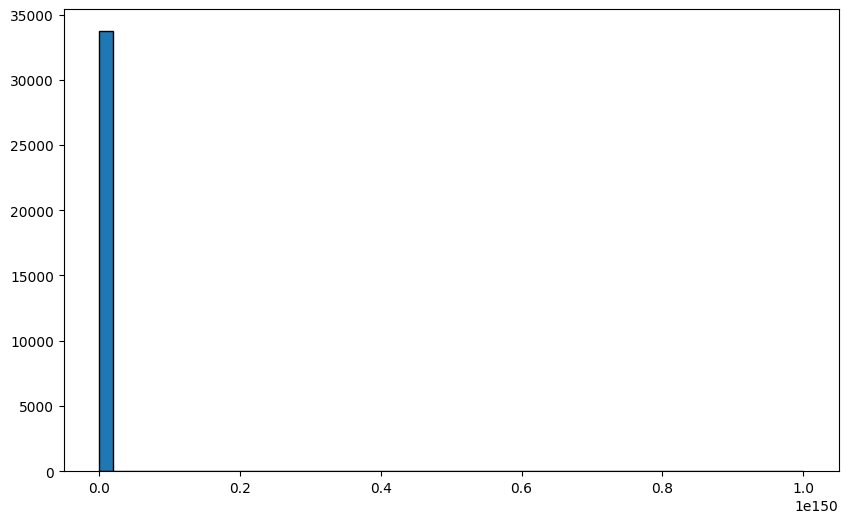

In [259]:
plt.figure(figsize=(10,6))
plt.hist(comp_total['CompTotal'], bins=50, edgecolor='black')
plt.show()

**Box Plots**

Plot a box plot of Age.


In [260]:
query = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
"""
age = pd.read_sql(query, conn)
age.value_counts()

Age               
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

In [261]:
def get_age(age):
    if age == '25-34 years old':
        return 30
    elif age == '18-24 years old':
        return 21
    elif age == '35-44 years old':
        return 39   
    elif age == '45-54 years old':
        return 49
    elif age == '55-64 years old':
        return 59
    elif age == '65 years or older':
        return 70
    elif age == 'Under 18 years old':
        return 17   
    else:
        return 20
age['Age'] = age['Age'].apply(get_age)
age

,Age
0,17
1,39
2,49
3,21
4,21
...,...
65432,21
65433,30
65434,30
65435,21


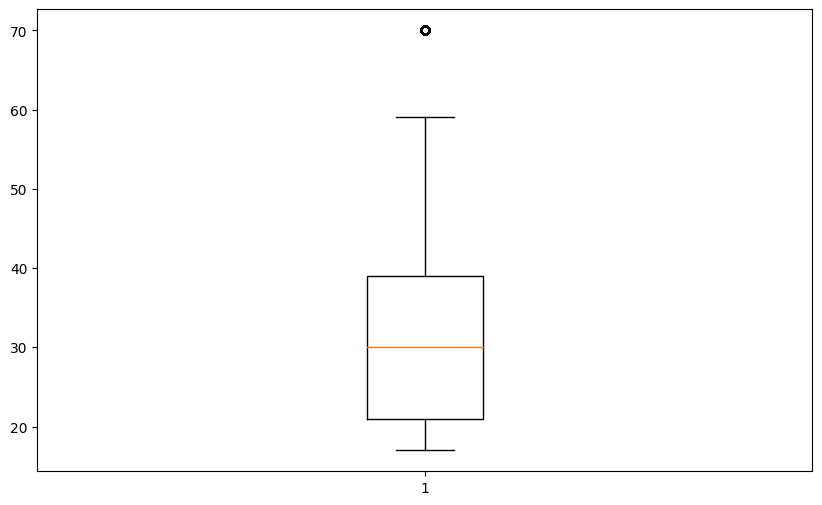

In [262]:
plt.figure(figsize=(10,6))
plt.boxplot(age)
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


In [263]:
query = """
SELECT WorkExp, Age
FROM main
"""

work_exp_age = pd.read_sql(query, conn)
work_exp_age

,WorkExp,Age
0,NaN,Under 18 years old
1,17.0,35-44 years old
2,NaN,45-54 years old
3,NaN,18-24 years old
4,NaN,18-24 years old
...,...,...
65432,NaN,18-24 years old
65433,NaN,25-34 years old
65434,NaN,25-34 years old
65435,5.0,18-24 years old


In [264]:
def get_age(age):
    if age == '25-34 years old':
        return 30
    elif age == '18-24 years old':
        return 21
    elif age == '35-44 years old':
        return 39   
    elif age == '45-54 years old':
        return 49
    elif age == '55-64 years old':
        return 59
    elif age == '65 years or older':
        return 70
    elif age == 'Under 18 years old':
        return 17   
    else:
        return 20
work_exp_age['Age'] = work_exp_age['Age'].apply(get_age)
work_exp_age.dropna(inplace=True)
work_exp_age

,WorkExp,Age
1,17.0,39
10,15.0,39
12,12.0,39
15,29.0,49
18,12.0,30
...,...,...
65353,11.0,30
65388,9.0,30
65408,9.0,30
65412,18.0,39


In [265]:
print(len(work_exp_age['Age']))
print(len(work_exp_age['WorkExp']))

29658
29658


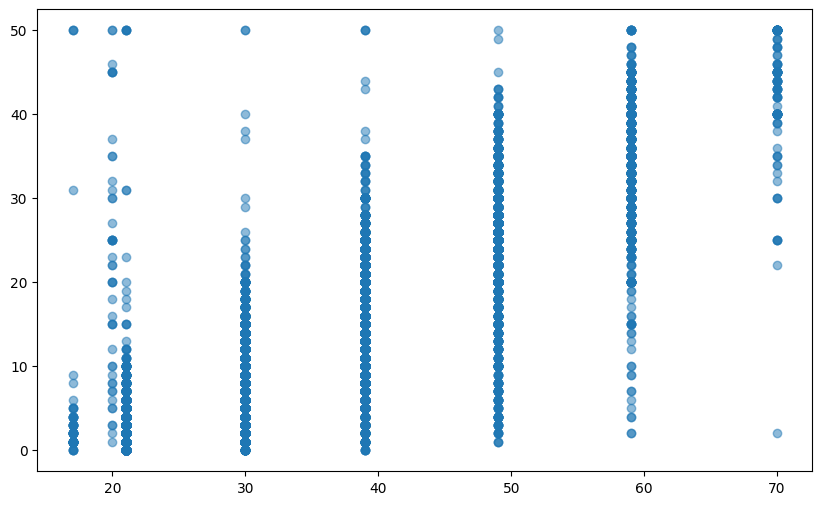

In [266]:
plt.figure(figsize=(10,6))
plt.scatter(work_exp_age['Age'],work_exp_age['WorkExp'], alpha=0.5)
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [267]:
query = """
SELECT TimeSearching, Frustration, Age
FROM main
WHERE TimeSearching IS NOT NULL AND Frustration IS NOT NULL AND Age IS NOT NULL
"""
time_frus = pd.read_sql(query, conn)
time_frus['Age'] = time_frus['Age'].apply(get_age)
time_frus['TimeSearching'].value_counts()   

TimeSearching
30-60 minutes a day           10657
15-30 minutes a day            7583
60-120 minutes a day           5112
Less than 15 minutes a day     2601
Over 120 minutes a day         2132
Name: count, dtype: int64

In [268]:
mapping = {
    "Less than 15 minutes a day": 10,
    "15-30 minutes a day": 22,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "More than 4 hours a day": 240
}
time_frus["TimeMinutes"] = time_frus["TimeSearching"].map(mapping)

time_frus["MainFrustration"] = time_frus["Frustration"].str.split(";").str[0]
time_frus

,TimeSearching,Frustration,Age,TimeMinutes,MainFrustration
0,30-60 minutes a day,Amount of technical debt;Number of software to...,39,45.0,Amount of technical debt
1,30-60 minutes a day,Amount of technical debt;Complexity of tech st...,39,45.0,Amount of technical debt
2,60-120 minutes a day,Amount of technical debt;Complexity of tech st...,49,90.0,Amount of technical debt
3,15-30 minutes a day,Amount of technical debt;Tracking my work;Comp...,30,22.0,Amount of technical debt
4,Less than 15 minutes a day,Number of software tools in use;Tracking my wo...,30,10.0,Number of software tools in use
...,...,...,...,...,...
28080,60-120 minutes a day,Amount of technical debt;Showing my contributi...,30,90.0,Amount of technical debt
28081,60-120 minutes a day,Tracking my work;Complexity of tech stack for ...,21,90.0,Tracking my work
28082,Less than 15 minutes a day,None of these,30,10.0,None of these
28083,15-30 minutes a day,Complexity of tech stack for deployment;Comple...,30,22.0,Complexity of tech stack for deployment


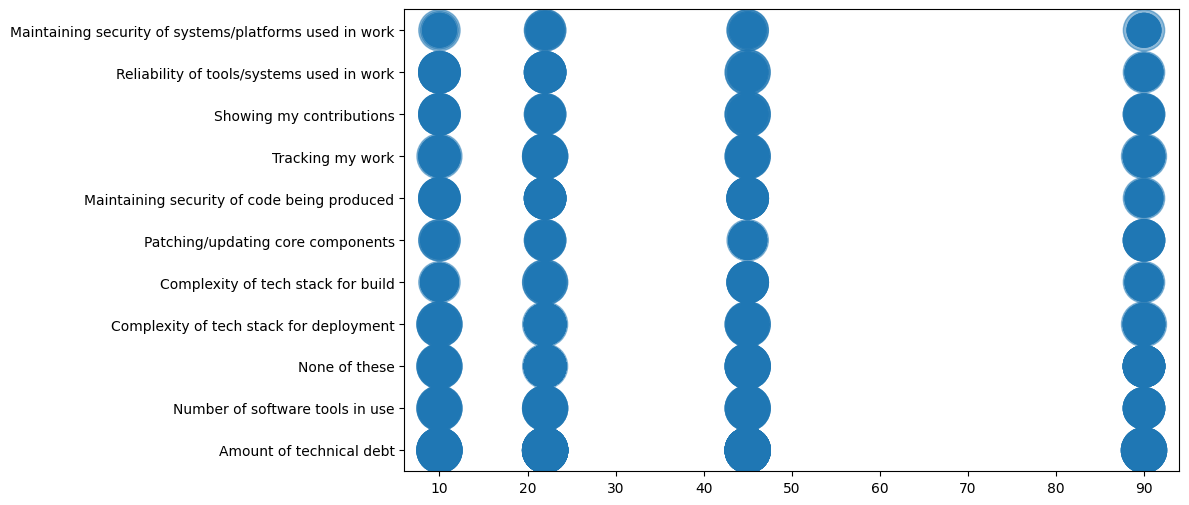

In [269]:
plt.figure(figsize=(10,6))
plt.scatter(
    x=time_frus["TimeMinutes"],
    y=time_frus["MainFrustration"],
    s=time_frus["Age"] * 15,
    alpha=0.5
)
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [270]:
query = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df_want = pd.read_sql(query, conn)
df_want

,DatabaseWantToWorkWith
0,PostgreSQL
1,Firebase Realtime Database
2,MongoDB;MySQL;PostgreSQL
3,PostgreSQL;SQLite
4,Cloud Firestore
...,...
42553,Dynamodb
42554,BigQuery;Cassandra;Databricks SQL;DuckDB;Elast...
42555,Elasticsearch;PostgreSQL;Redis
42556,PostgreSQL;SQLite


In [271]:
df_split = df_want["DatabaseWantToWorkWith"].str.split(";").explode().reset_index(drop=True)
top_5 = df_split.value_counts().head(5)
top_5

DatabaseWantToWorkWith
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64

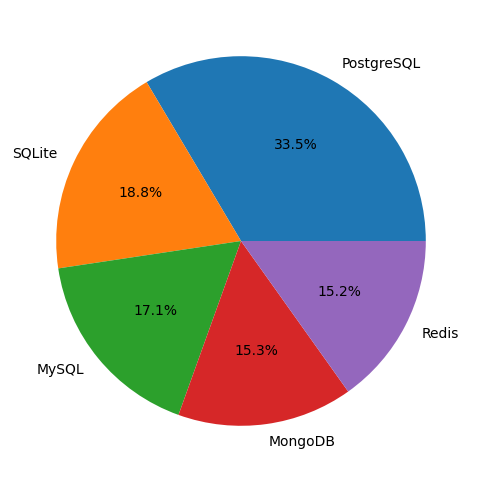

In [272]:
plt.figure(figsize=(10,6))
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%')
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [282]:
query = """
SELECT TimeSearching, TimeAnswering, Age
FROM main
WHERE Age IS NOT NULL
  AND TimeSearching IS NOT NULL
  AND TimeAnswering IS NOT NULL
"""
time_ans = pd.read_sql(query, conn)
time_ans['Age'] = time_ans['Age'].apply(get_age)
time_ans

,TimeSearching,TimeAnswering,Age
0,30-60 minutes a day,60-120 minutes a day,39
1,30-60 minutes a day,15-30 minutes a day,39
2,60-120 minutes a day,60-120 minutes a day,49
3,15-30 minutes a day,30-60 minutes a day,30
4,Less than 15 minutes a day,15-30 minutes a day,30
...,...,...,...
28746,30-60 minutes a day,60-120 minutes a day,21
28747,60-120 minutes a day,60-120 minutes a day,21
28748,Less than 15 minutes a day,Less than 15 minutes a day,30
28749,15-30 minutes a day,Less than 15 minutes a day,30


In [288]:
time_answering = {
    "Less than 15 minutes a day": 10,
    "15-30 minutes a day": 22,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150
}
time_ans["TimeSearchingMin"] = time_ans["TimeSearching"].map(mapping)
time_ans["TimeAnsweringMin"] = time_ans["TimeAnswering"].map(mapping)
median_values = {
    "TimeSearching": time_ans["TimeSearchingMin"].median(),
    "TimeAnswering": time_ans["TimeAnsweringMin"].median()}
time_ans

,TimeSearching,TimeAnswering,Age,TimeSearchingMin,TimeAnsweringMin
0,30-60 minutes a day,60-120 minutes a day,39,45.0,90.0
1,30-60 minutes a day,15-30 minutes a day,39,45.0,22.0
2,60-120 minutes a day,60-120 minutes a day,49,90.0,90.0
3,15-30 minutes a day,30-60 minutes a day,30,22.0,45.0
4,Less than 15 minutes a day,15-30 minutes a day,30,10.0,22.0
...,...,...,...,...,...
28746,30-60 minutes a day,60-120 minutes a day,21,45.0,90.0
28747,60-120 minutes a day,60-120 minutes a day,21,90.0,90.0
28748,Less than 15 minutes a day,Less than 15 minutes a day,30,10.0,10.0
28749,15-30 minutes a day,Less than 15 minutes a day,30,22.0,10.0


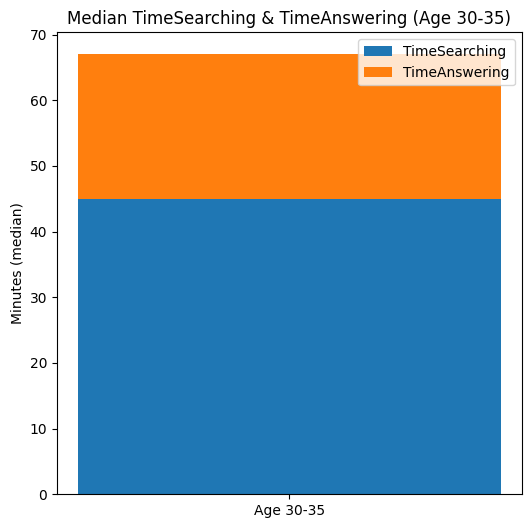

In [ ]:
plt.figure(figsize=(6,6))

plt.bar(
    ["Age 30-35"], 
    median_values["TimeSearching"], 
    label="TimeSearching"
)
plt.bar(
    ["Age 30-35"], 
    median_values["TimeAnswering"], 
    bottom=median_values["TimeSearching"], 
    label="TimeAnswering"
)
plt.legend()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [292]:
query = """
SELECT CompTotal, Age
FROM main
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL
"""
comp_age = pd.read_sql(query, conn)
comp_age['Age'] = comp_age['Age'].apply(get_age)
comp_age

,CompTotal,Age
0,2040000.0,21
1,28000.0,30
2,85000.0,39
3,50000.0,39
4,110000.0,30
...,...,...
33735,36000.0,21
33736,40000.0,30
33737,61000.0,30
33738,58000.0,39


In [302]:
df_age = comp_age[(comp_age["Age"] >= 45) & (comp_age["Age"] <= 60)]
df_age['Age'].value_counts()   

Age
49    3516
59    1279
Name: count, dtype: int64

In [303]:
median_comp = df_age.groupby("Age")["CompTotal"].median()
median_comp

Age
49    130000.0
59    135000.0
Name: CompTotal, dtype: float64

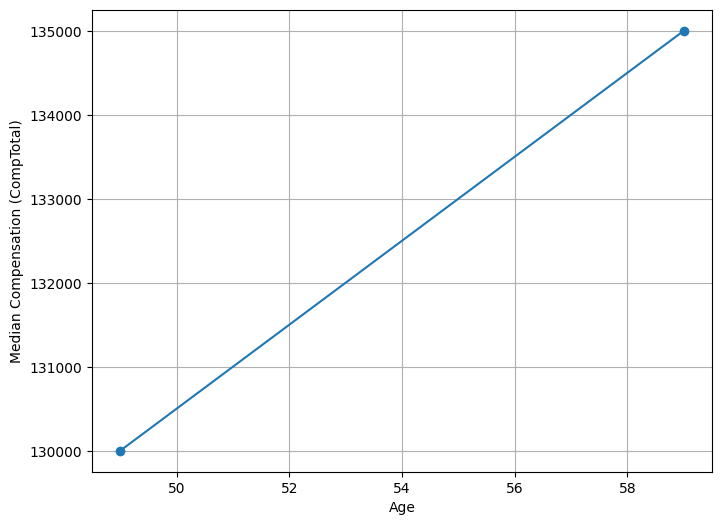

In [304]:
plt.figure(figsize=(8,6))
plt.plot(median_comp.index, median_comp.values, marker="o")
plt.xlabel("Age")
plt.ylabel("Median Compensation (CompTotal)")
plt.grid(True)
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [309]:
query = """
SELECT MainBranch
FROM main
WHERE MainBranch IS NOT NULL
"""
mainb = pd.read_sql(query, conn)
counts = mainb["MainBranch"].value_counts()
counts

MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64

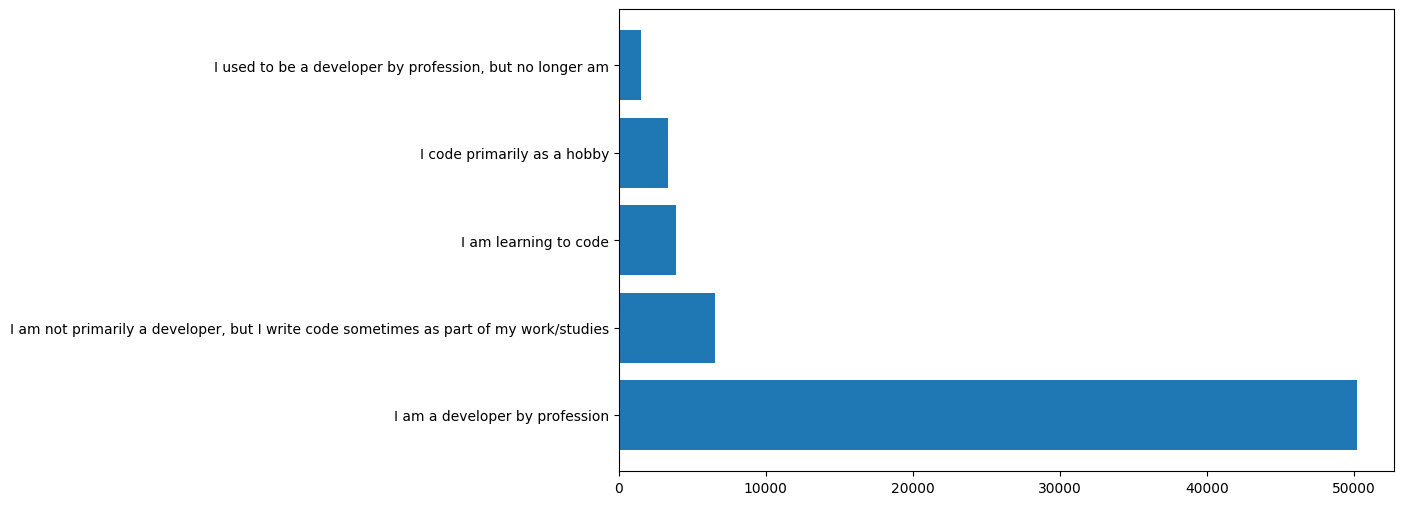

In [313]:
plt.figure(figsize=(10,6))
plt.barh(counts.index, counts.values)
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [314]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
